# Estadistica y Probabilidad

## P value y Correlación

In [ ]:
from scipy.stats import pearsonr
import numpy as np

horas_sueño = np.array([5, 6, 7, 8, 9])
notas = np.array([60, 65, 70, 75, 90])

coef, p_value = pearsonr(horas_sueño, notas)
print(f'Correlacion: {coef:.3f}')
print(f'Valor p: {p_value:.3f}')

if p_value < 0.05:
    print('La correlacion es significativa')
    print('Se rechaza la hipotesis nula, por lo tanto las horas de sueño afectan las notas')
else:
    print('La correlacion no es significativa')
    print('No se rechaza la hipotesis nula, por lo tanto las horas de sueño afectan las notas')

Correlacion: 0.962
Valor p: 0.009
La correlacion es significativa
Se rechaza la hipotesis nula, por lo tanto las horas de sueño afectan las notas


## Distribucion de muestreo

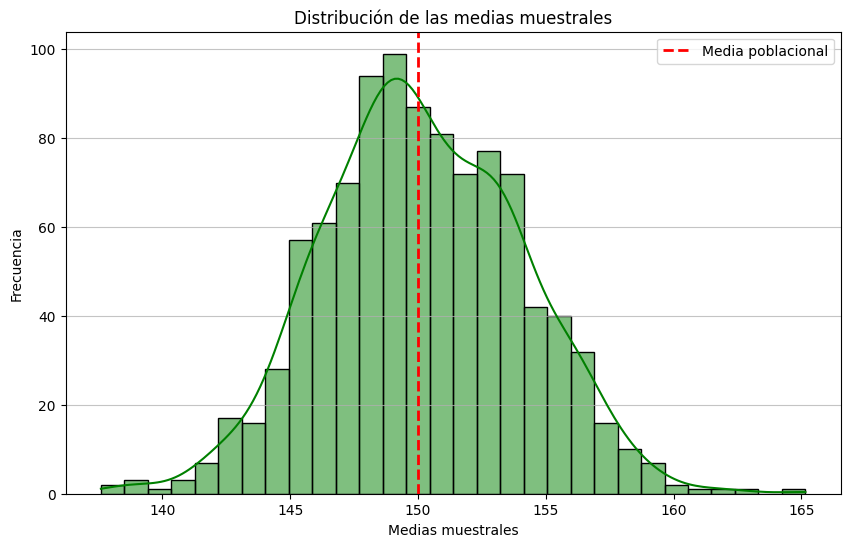

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mu_pobla = 150 #media poblacional
std_pobla = 20 #desviacion estandar
n_muestras = 1000
tam_muestra = 25
medias_muestrales = []

for _ in range(n_muestras):
    muestra = np.random.gamma(shape = (mu_pobla/ std_pobla) ** 2, scale = std_pobla ** 2 / mu_pobla, size = tam_muestra)
    media_muestrales = np.mean(muestra)
    medias_muestrales.append(media_muestrales)

plt.figure(figsize=(10, 6))
sns.histplot(medias_muestrales, bins=30, kde=True, color = 'green')
plt.axvline(mu_pobla, color = 'red', linestyle = 'dashed', linewidth = 2, label = 'Media poblacional')
plt.title('Distribución de las medias muestrales de pesos de manzanas')
plt.xlabel('Medias muestrales de los pesos gr')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis = 'y', alpha = 0.75)
plt.show()

In [ ]:
print(f'Media de las medias muestrales {np.mean(medias_muestrales):.2f} gr')
print(f'Desviacion estandar de las medias muestrales {np.std(medias_muestrales):.2f} gr')
print(f'Error estandar teorico de las medias muestrales {std_pobla / np.sqrt(tam_muestra):.2f} gr')

Media de las medias muestrales 150.17 gr
Desviacion estandar de las medias muestrales 3.89 gr
Error estandar teorico de las medias muestrales 4.00 gr


## Ley de los grandes numeros

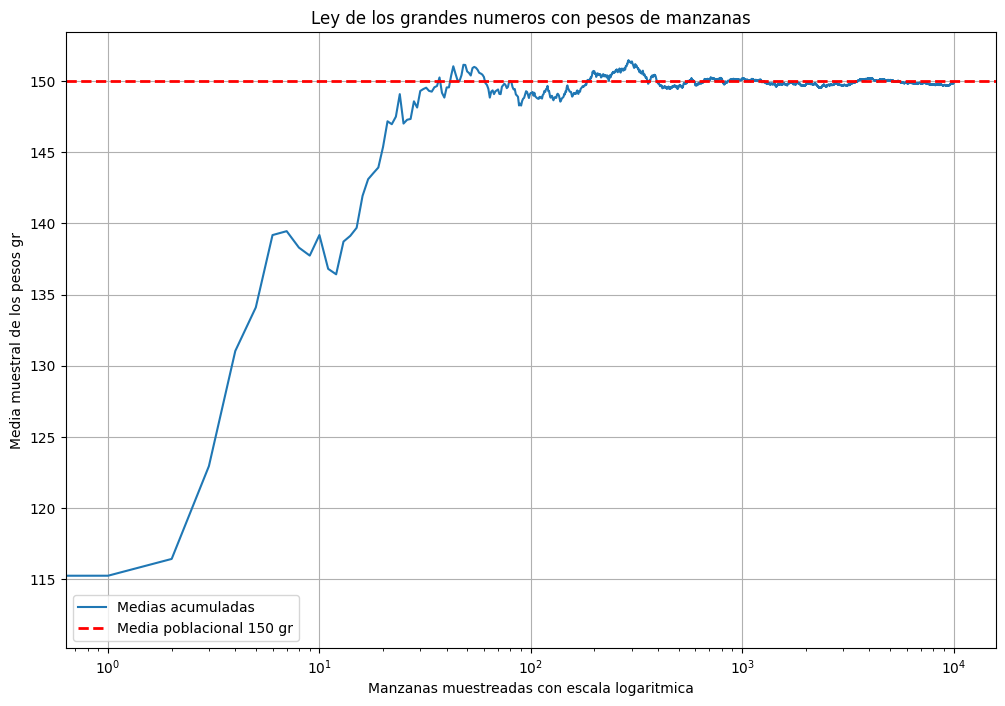

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu_pobla = 150
sigma_pobla = 20
muestra_lgn = [10, 100, 500, 1000, 5000, 10000]
medias_acum = []
obs = np.random.normal(loc = mu_pobla, scale = sigma_pobla, size = 10000)

suma = 0
contador = 0

for i in range(len(obs)):
  suma += obs[i]
  contador += 1
  medias_acum.append(suma / contador)

plt.figure(figsize = (12, 8))
plt.plot(medias_acum, label = 'Medias acumuladas')
plt.axhline(mu_pobla, color = 'red', linestyle = '--', linewidth = 2, label = f'Media poblacional {mu_pobla} gr')
plt.xscale('log') #ver convergencia
plt.title('Ley de los grandes numeros con pesos de manzanas')
plt.xlabel('Manzanas muestreadas con escala logaritmica')
plt.ylabel('Media muestral de los pesos gr')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
for i in muestra_lgn:
  print(f'Media de la muestra con n = {i}: {np.mean(obs[:i]):.2f} gr')

Media de la muestra con n = 10: 137.73 gr
Media de la muestra con n = 100: 149.05 gr
Media de la muestra con n = 500: 149.50 gr
Media de la muestra con n = 1000: 150.14 gr
Media de la muestra con n = 5000: 150.03 gr
Media de la muestra con n = 10000: 149.83 gr


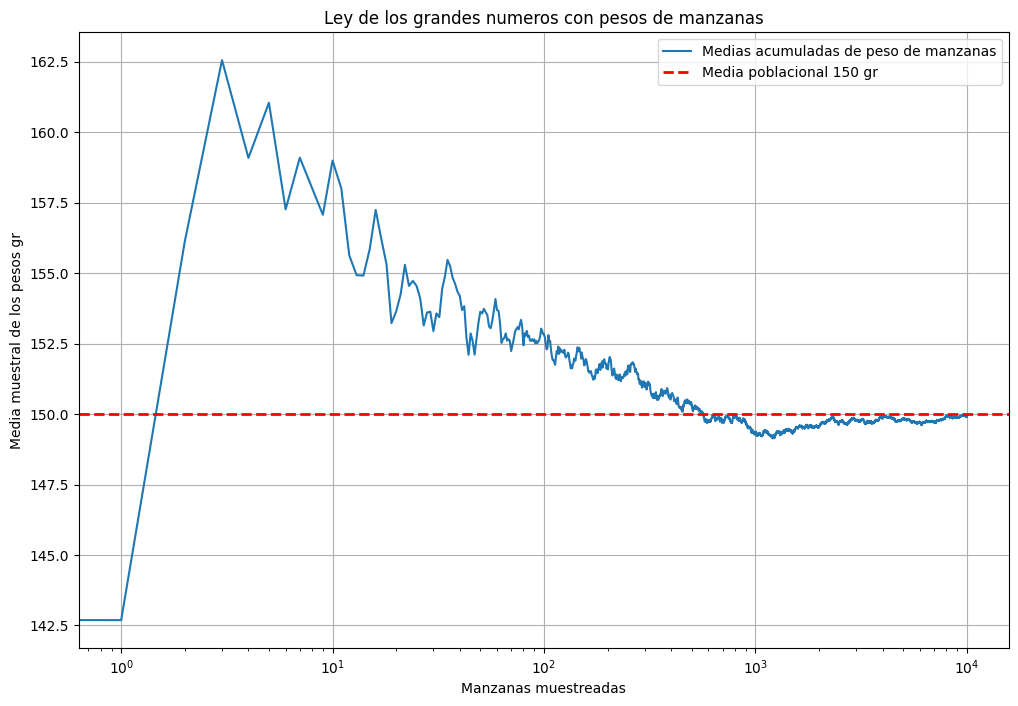

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu_pobla = 150
sigma_pobla = 20
n_sim = 10000
medias_acum = []
obs = np.random.normal(loc = mu_pobla, scale = sigma_pobla, size = n_sim)

suma = 0
contador = 0

for i in range(n_sim):
  suma += obs[i]
  contador += 1
  medias_acum.append(suma / contador)

plt.figure(figsize = (12, 8))
plt.plot(medias_acum, label = 'Medias acumuladas de peso de manzanas')
plt.axhline(mu_pobla, color = 'red', linestyle = '--', linewidth = 2, label = f'Media poblacional {mu_pobla} gr')
plt.xscale('log')
plt.title('Ley de los grandes numeros con pesos de manzanas')
plt.xlabel('Manzanas muestreadas')
plt.ylabel('Media muestral de los pesos gr')
plt.legend()
plt.grid(True)
plt.show()

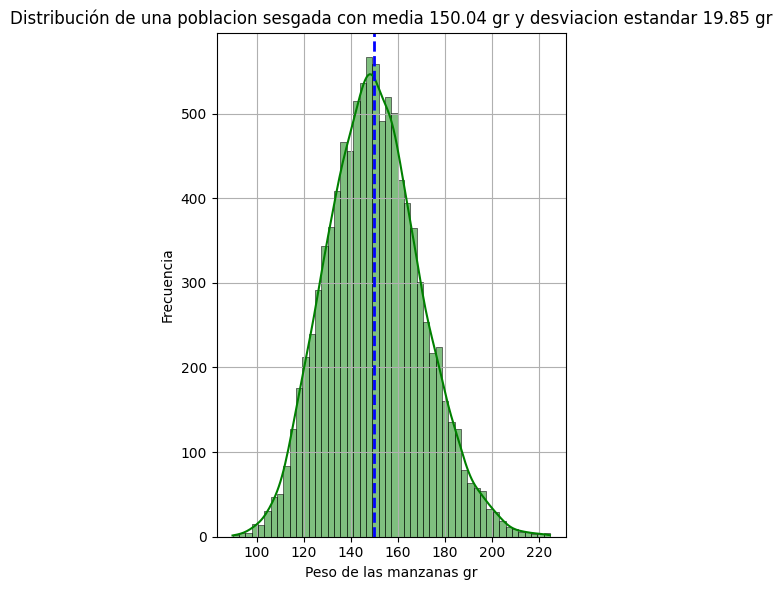

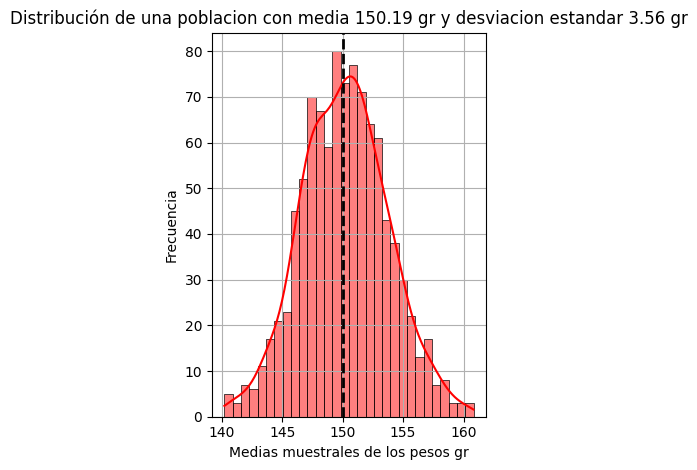

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import gamma
import matplotlib.pyplot as plt
import seaborn as sns

mu_pobla = 150
sigma_pobla = 20

alpha = (mu_pobla / sigma_pobla) ** 2
beta = sigma_pobla ** 2 / mu_pobla

pobla_sesgada = gamma.rvs(a = alpha, scale = beta, size = 10000)

plt.figure(figsize = (8, 6))
plt.subplot(1, 2, 1)
sns.histplot(pobla_sesgada, bins = 50, kde = True, color = 'green')
plt.axvline(mu_pobla, color = 'blue', linestyle = '--', linewidth = 2, label = 'Media poblacional')
plt.title(f'Distribución de una poblacion sesgada con media {np.mean(pobla_sesgada):.2f} gr y desviacion estandar {np.std(pobla_sesgada):.2f} gr')
plt.xlabel('Peso de las manzanas gr')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

n_muestra = 5000
tam_muestra_tlc = 30
media_muestra_tcl = []

for _ in range(1, n_muestras):
  muestra = np.random.choice(pobla_sesgada, size = tam_muestra_tlc, replace = True)
  media_muestra_tcl.append(np.mean(muestra))

plt.subplot(1, 2, 2)
sns.histplot(media_muestra_tcl, bins = 30, kde = True, color = 'red')
plt.axvline(mu_pobla, color = 'black', linestyle = '--', linewidth = 2, label = 'Media poblacional')
plt.title(f'Distribución de una poblacion con media {np.mean(media_muestra_tcl):.2f} gr y desviacion estandar {np.std(media_muestra_tcl):.2f} gr')
plt.xlabel('Medias muestrales de los pesos gr')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(f'Media de la poblacion simulada: {np.mean(pobla_sesgada):.2f} gr')
print(f'Desviacion estandar de la poblacion simulada: {np.std(pobla_sesgada):.2f} gr')
print(f'Media de las medias muestrales (empirica): {np.mean(media_muestra_tcl):.2f} gr')
print(f'Desviacion estandar de la poblacion muestreada (empirica): {np.std(media_muestra_tcl):.2f} gr')
print(f'Error estandar de la poblacion muestreada (empirica): {sigma_pobla / np.sqrt(tam_muestra_tlc)} gr')

Media de la poblacion simulada: 150.04 gr
Desviacion estandar de la poblacion simulada: 19.85 gr
Media de las medias muestrales (empirica): 150.19 gr
Desviacion estandar de la poblacion muestreada (empirica): 3.56 gr
Error estandar de la poblacion muestreada (empirica): 3.6514837167011076 gr


## Calculo de la probabilidad con la Distribución Muestral

In [ ]:
from scipy.stats import norm

z = 1.5
p = 1 - norm.cdf(z)
print(f'P(z) > 1.5 es: {p:.4f}')

p1 = norm.sf(z)
print(f'{p1:.4f}')

P(z) > 1.5 es: 0.0668
0.0668


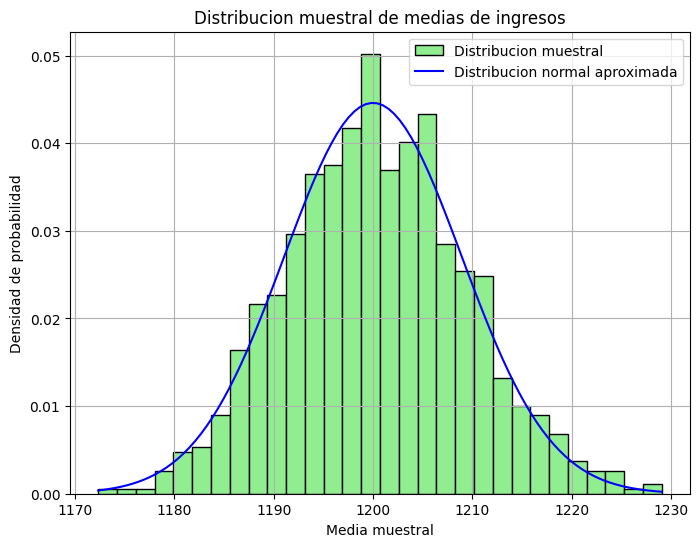

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

num_sim = 1000
medias_muestrales = []

for _ in range(num_sim):
  muestra = np.random.normal(loc = 1200, scale = 200, size = 500)
  medias_muestrales.append(np.mean(muestra))

plt.figure(figsize = (8, 6))
plt.hist(medias_muestrales, bins = 30, color = 'lightgreen', edgecolor = 'black', density = True, label = 'Distribucion muestral')
ax = np.linspace(min(medias_muestrales), max(medias_muestrales), 100)
plt.plot(ax, norm.pdf(ax, loc = 1200, scale = 200 / np.sqrt(500)), color = 'blue', label = 'Distribucion normal aproximada')
plt.title('Distribucion muestral de medias de ingresos')
plt.xlabel('Media muestral')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

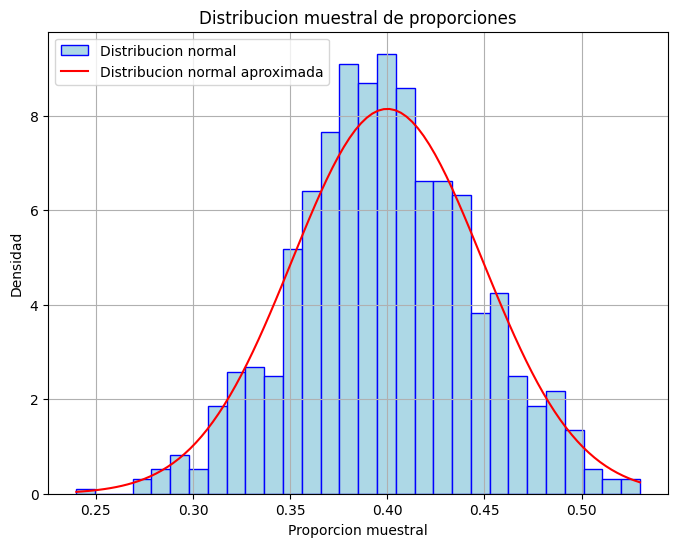

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

p_pobla = 0.4 #proporcion poblacional
muestra = 100
num_sim = 1000
prop_muestrales = [] #proporciones muestrales

for _ in range(num_sim):
  num_exitos = np.random.binomial(muestra, p_pobla, size = 1)
  prop_muestrales.append(num_exitos[0] / muestra)

plt.figure(figsize = (8, 6))
plt.hist(prop_muestrales, bins = 30, color = 'lightblue', edgecolor = 'blue', density = True, label = 'Distribucion normal')
ax = np.linspace(min(prop_muestrales), max(prop_muestrales), 100)
error_std = np.sqrt(p_pobla * (1 - p_pobla) / muestra)
plt.plot(ax, norm.pdf(ax, loc = p_pobla, scale = error_std), color = 'red', label = 'Distribucion normal aproximada')
plt.title('Distribucion muestral de proporciones')
plt.xlabel('Proporcion muestral')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu_muestral = 50
desv_pobla = 10
tam_muestra = 36
lvl_confianza = 0.95 #nivel de confianza

z_crit = norm.ppf(1- (1 - lvl_confianza) / 2)
print(f'Valor critico z para {lvl_confianza * 100}% de confianza: {z_crit:.2f}')

error_std = desv_pobla / np.sqrt(tam_muestra)
print(f'Error estandar: {error_std:.2f}')

marg_error = z_crit * error_std
print(f'Margen de error: {marg_error:.2f}')

lim_inf = mu_muestral - marg_error
lim_sup = mu_muestral + marg_error
print(f'El limite inferior del intervalo de confianza con {lvl_confianza * 100}% es: {lim_inf:.2f}')
print(f'El limite superior del intervalo de confianza con {lvl_confianza * 100}% es: {lim_sup:.2f}')

Valor critico z para 95.0% de confianza: 1.96
Error estandar: 1.67
Margen de error: 3.27
El limite inferior del intervalo de confianza con 95.0% es: 46.73
El limite superior del intervalo de confianza con 95.0% es: 53.27


In [ ]:
import numpy as np
from scipy.stats import t

media_muestral = 50
desv_muestral = 10
tam_muestra = 20
lvl_confianza = 0.95

grado_libertad = tam_muestra - 1

crit_t = t.ppf(1 - (1 - lvl_confianza) / 2, df = grado_libertad)
print(f'Valor critico t para {lvl_confianza * 100}% de confianza: {crit_t:.3f}, y {grado_libertad} grados de libertad')

error_std = desv_muestral / np.sqrt(tam_muestra)
print(f'Error estandar: {error_std:.2f}')

marg_error = crit_t * error_std
print(f'Margen de error: {marg_error:.2f}')

lim_inf = media_muestral - marg_error
lim_sup = media_muestral + marg_error
print(f'El limite inferior del intervalo de confianza con {lvl_confianza * 100}% es: {lim_inf:.2f}')
print(f'El limite superior del intervalo de confianza con {lvl_confianza * 100}% es: {lim_sup:.2f}')

Valor critico t para 95.0% de confianza: 2.093, y 19 grados de libertad
Error estandar: 2.24
Margen de error: 4.68
El limite inferior del intervalo de confianza con 95.0% es: 45.32
El limite superior del intervalo de confianza con 95.0% es: 54.68


In [ ]:
import numpy as np
from scipy.stats import norm

tam_muestra = 300
num_exitos = 120
lvl_confianza = 0.95

prop_muestral = num_exitos / tam_muestra #p gorrito
print(f'El valor de p gorrito de es {prop_muestral:.2f}')

z_crit = norm.ppf(1- (1 - lvl_confianza) / 2)
print(f'Valor critico z para {lvl_confianza * 100}% de confianza: {z_crit:.2f}')

error_std = np.sqrt(prop_muestral * (1 -  prop_muestral) /tam_muestra)
print(f'Error estandar: {error_std:.2f}')

marg_error = z_crit * error_std
print(f'Margen de error: {marg_error:.2f}')

lim_inf = prop_muestral - marg_error
lim_sup = prop_muestral + marg_error
print(f'El limite inferior del intervalo de confianza con {lvl_confianza * 100}% es: {lim_inf * 100:.2f}%')
print(f'El limite superior del intervalo de confianza con {lvl_confianza * 100}% es: {lim_sup * 100:.2f}%')

El valor de p gorrito de es 0.40
Valor critico z para 95.0% de confianza: 1.96
Error estandar: 0.03
Margen de error: 0.06
El limite inferior del intervalo de confianza con 95.0% es: 34.46%
El limite superior del intervalo de confianza con 95.0% es: 45.54%


In [ ]:
from scipy.stats import norm

lvls_confianza = [0.90, 0.95, 0.99]

for nc in lvls_confianza:
  z_crit = norm.ppf(1- (1 - nc) / 2)
  print(f'Valor critico z para {nc * 100}% de confianza: {z_crit:.2f}')

Valor critico z para 90.0% de confianza: 1.64
Valor critico z para 95.0% de confianza: 1.96
Valor critico z para 99.0% de confianza: 2.58


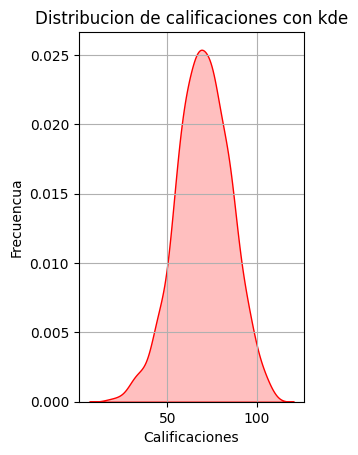

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

resultados = np.random.randn(1000) * 15 + 70

#plt.subplot(1, 2, 1)
#sns.histplot(data = resultados, kde = True, color = 'blue', bins = 30)
plt.subplot(1, 2, 2)
sns.kdeplot(data = resultados, fill = True, color = 'red')
plt.title('Distribucion de calificaciones con kde')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencua')
plt.grid(True)
plt.show()

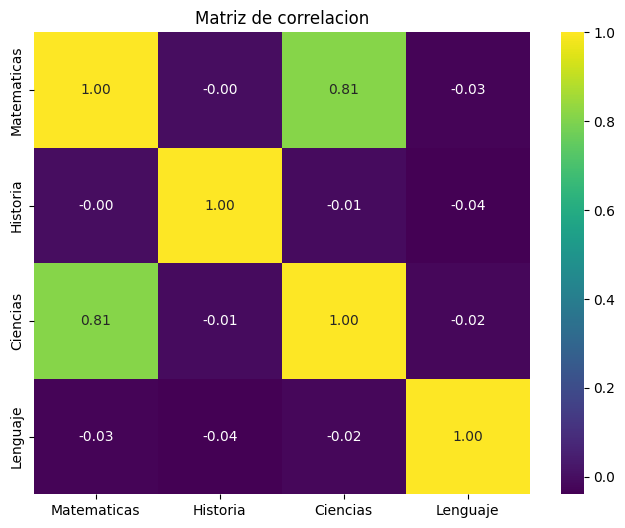

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

data = {'Estudiante': [f'Estudiante_{i}'for i in range(1, 1001)],
        'Matematicas': np.random.normal(loc = 75, scale = 10, size = 1000),
        'Historia': np.random.normal(loc = 70, scale = 12, size = 1000),
        'Ciencias': np.random.normal(loc = 65, scale = 8, size = 1000),
        'Lenguaje': np.random.normal(loc = 80, scale = 7, size = 1000),
        'Genero': np.random.choice(['M', 'F'], 1000)}

df = pd.DataFrame(data)

df['Matematicas'] = df['Matematicas'] + np.random.normal(loc = 0, scale = 5, size = 1000)
df['Ciencias'] = df['Ciencias'] + df['Matematicas']

matriz_corr = df.select_dtypes('number').corr()
#print('Matriz de correlacion')
#matriz_corr

plt.figure(figsize = (8, 6))
sns.heatmap(data = matriz_corr, annot = True, fmt = '.2f', cmap = 'viridis')
plt.title('Matriz de correlacion')
plt.show()

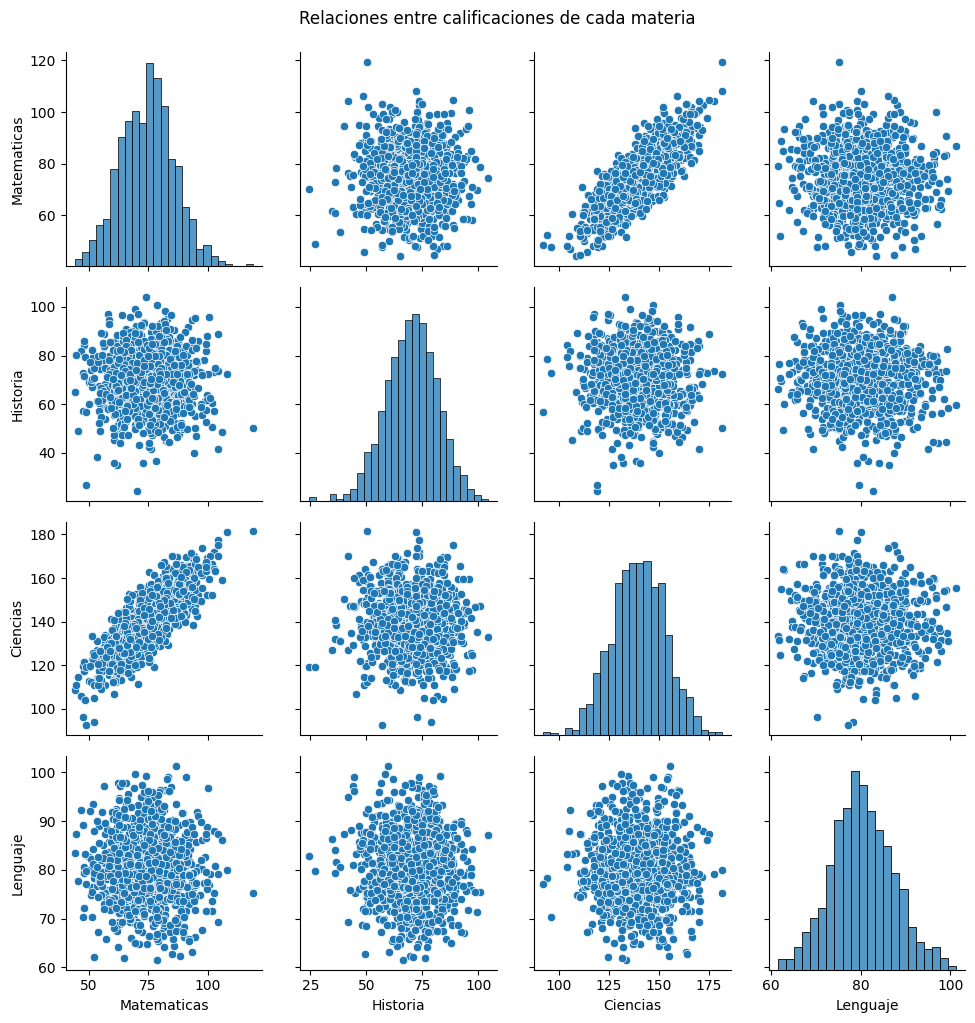

In [ ]:
g = sns.PairGrid(data = df, x_vars = ['Matematicas', 'Historia', 'Ciencias', 'Lenguaje'])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.fig.suptitle('Relaciones entre calificaciones de cada materia', y = 1.02)
plt.show()

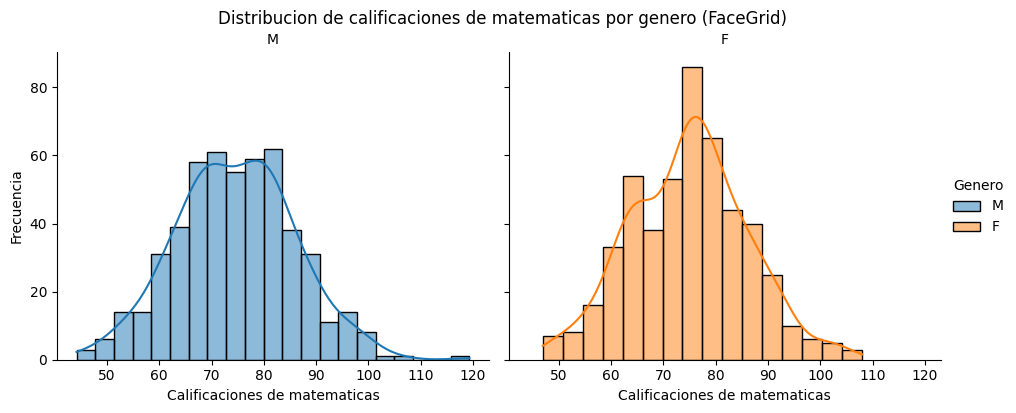

In [ ]:
g1 = sns.FacetGrid(data = df, col = 'Genero', hue = 'Genero', col_wrap = 2, height = 4, aspect = 1.2)
g1.map_dataframe(sns.histplot, x = 'Matematicas', kde = True)
g1.set_axis_labels('Calificaciones de matematicas', 'Frecuencia')
g1.set_titles('{col_name}')
g1.add_legend()
plt.suptitle('Distribucion de calificaciones de matematicas por genero (FaceGrid)', y = 1.02)
plt.show()

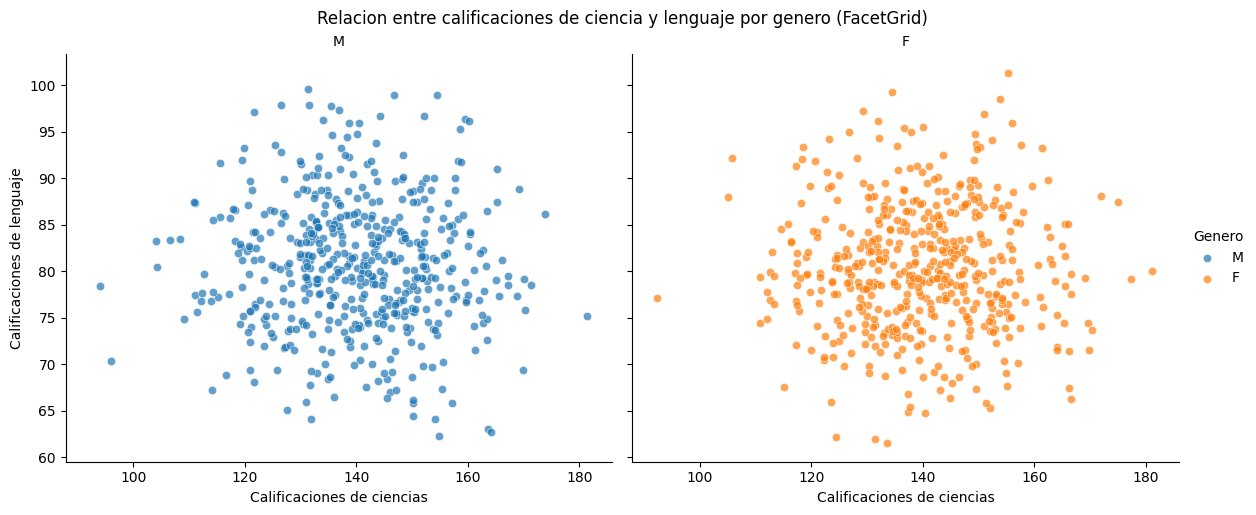

In [ ]:
g2 = sns.FacetGrid(data = df, col = 'Genero', hue = 'Genero', col_wrap = 2, height = 5, aspect = 1.2)
g2.map_dataframe(sns.scatterplot, x = 'Ciencias', y = 'Lenguaje', alpha = 0.7)
g2.set_axis_labels('Calificaciones de ciencias', 'Calificaciones de lenguaje')
g2.set_titles('{col_name}')
g2.add_legend()
plt.suptitle('Relacion entre calificaciones de ciencia y lenguaje por genero (FacetGrid)', y = 1.02)
plt.show()

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, ttest_1samp, t

np.random.seed(25)

num_clientes = 1000
data = {'Ingreso_Mensual': np.random.normal(loc = 3500, scale = 800, size = num_clientes),
        'Edad': np.random.randint(18, 70, num_clientes),
        'Preferencia_Productos': np.random.choice(['Si', 'No'], size = num_clientes, p = [0.55, 0.45])}

df = pd.DataFrame(data)
df['Ingreso_Mensual'] = df['Ingreso_Mensual'].apply(lambda x: max(100, x)) #para que no sea negativo
#print(df.head())
print(df.describe().T)

media_muestral_ingresos = df['Ingreso_Mensual'].mean()
print(f'Media muestral de ingresos: {media_muestral_ingresos:.3f}')
desv_muestral_ingresos = df['Ingreso_Mensual'].std(ddof = 1) #grados de libertad delta, cuanto se resta n-1
print(f'Desviacion estandar de ingresos: {desv_muestral_ingresos:.3f}')
num_ingresos = len(df)
print(f'Numero de registros: {num_ingresos}')

lvl_confianza = 0.95
grados_libertad_ingresos = num_ingresos - 1

t_crit_ingresos =  t.ppf(1 - (1 - lvl_confianza) / 2, df = grados_libertad_ingresos)
print(f'Valor de t critico de los ingresos mensuales: {t_crit_ingresos:.2f}')

error_std_ingresos = desv_muestral_ingresos / np.sqrt(num_ingresos)
print(f'Error estandar de los ingresos mensuales: {error_std_ingresos:.2f}')

marg_error_ingresos = t_crit_ingresos * error_std_ingresos
print(f'Margen de error de los ingresos: {marg_error_ingresos:.2f}')

lim_inf = media_muestral_ingresos - marg_error_ingresos
lim_sup = media_muestral_ingresos + marg_error_ingresos
print(f'El limite inferior de los ingresos mensuales es: {lim_inf:.2f}')
print(f'El limite superior de los ingresos mensuales es: {lim_sup:.2f}')

#H0: mu = 3400
#H1: mu != 3400

mu_H0 = 3400
t_stat, p_value = ttest_1samp(df['Ingreso_Mensual'], mu_H0)
print(f'Prueba de hipotesis: {t_stat:.2f}') #el signo indica la direccion de la diferencia
print(f'Valor p: {p_value:.8f}')

if p_value < 0.05:
  print(f'Como el valor de p es menor a 0.05, rechazamos la hipotesis nula H0')
  print(f'Se concluye que el ingreso promedio de la poblacion no es {mu_H0}')
else:
  print(f'Como el valor de p es mayor a 0.05, aceptamos la hipotesis nula H0')
  print(f'Se concluye que el ingreso promedio de la poblacion es {mu_H0}')

                  count         mean         std          min          25%  \
Ingreso_Mensual  1000.0  3528.650967  831.273842  1038.394068  3019.827842   
Edad             1000.0    43.740000   14.551500    18.000000    32.000000   

                         50%          75%          max  
Ingreso_Mensual  3528.248486  4076.321171  6519.312197  
Edad               44.000000    56.000000    69.000000  
Media muestral de ingresos: 3528.651
Desviacion estandar de ingresos: 831.274
Numero de registros: 1000
Valor de t critico de los ingresos mensuales: 1.96
Error estandar de los ingresos mensuales: 26.29
Margen de error de los ingresos: 51.58
El limite inferior de los ingresos mensuales es: 3477.07
El limite superior de los ingresos mensuales es: 3580.24
Prueba de hipotesis: 4.89
Valor p: 0.00000115
Como el valor de p es menor a 0.05, rechazamos la hipotesis nula H0
Se concluye que el ingreso promedio de la poblacion no es 3400


In [ ]:
exitos_pref = df['Preferencia_Productos'].value_counts()['Si']

p_gorrito_pref = exitos_pref / num_clientes
print(f'El valor de p gorrito es: {p_gorrito_pref}')

lvl_confianza_pref = 0.95

z_crit_pref = norm.ppf(1 - (1 - lvl_confianza) / 2)
print(f'Valor critico z de las preferencias es: {z_crit_pref:.2f}')

error_std_pref = np.sqrt(p_gorrito_pref * (1 - p_gorrito_pref) / num_clientes)
print(f'El error estandar de las preferencias es: {error_std_pref:.2f}')

marg_error_pref = error_std_pref * z_crit_pref
print(f'El margen de error de las preferencias es: {marg_error_pref:.2f}')

lim_inf_pref = p_gorrito_pref - marg_error_pref
lim_sup_pref = p_gorrito_pref + marg_error_pref
print(f'El limite inferior de las preferencias es: {lim_inf_pref:.2f}')
print(f'El limite superior de las preferencias es: {lim_sup_pref:.2f}')

El valor de p gorrito es: 0.558
Valor critico z de las preferencias es: 1.96
El error estandar de las preferencias es: 0.02
El margen de error de las preferencias es: 0.03
El limite inferior de las preferencias es: 0.53
El limite superior de las preferencias es: 0.59


###  Histograma de la distribucion ingresos mensuales con kde

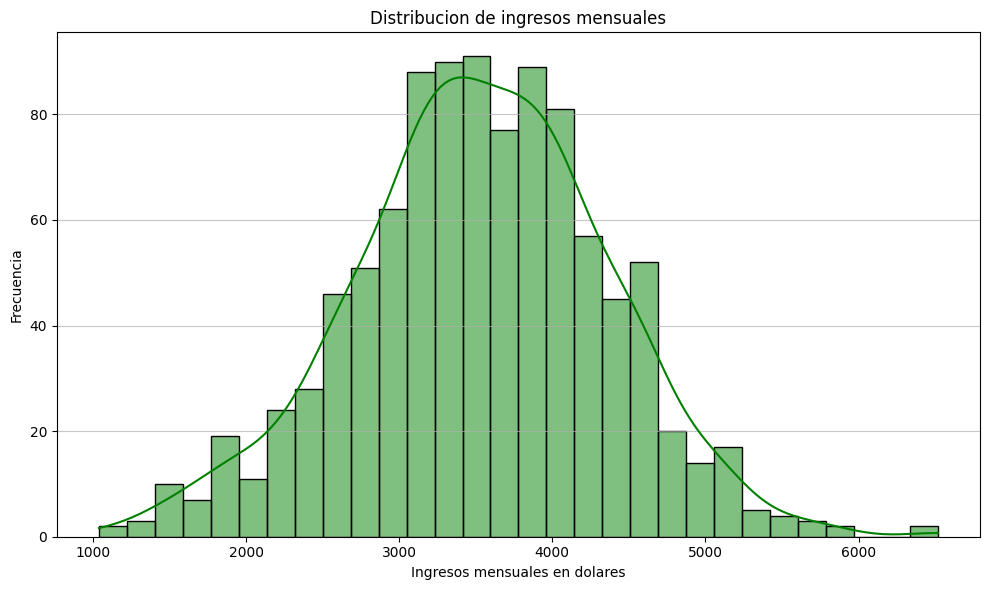

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'Ingreso_Mensual', kde = True, color = 'green', bins = 30)
plt.title('Distribucion de ingresos mensuales')
plt.xlabel('Ingresos mensuales en dolares')
plt.ylabel('Frecuencia')
plt.grid(axis = 'y', alpha = 0.7)
plt.tight_layout()
plt.show()

### Relacion entre ingresos y edad

<Figure size 1000x1000 with 0 Axes>

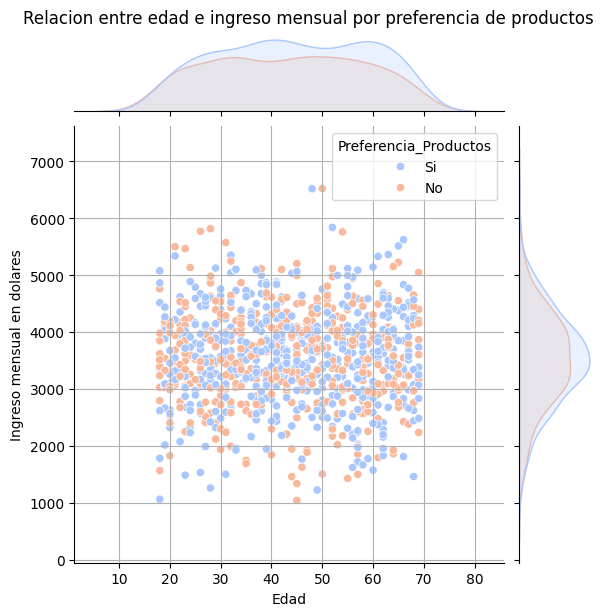

In [ ]:
plt.figure(figsize = (10, 10))
sns.jointplot(data = df, x = 'Edad', y = 'Ingreso_Mensual', kind = 'scatter', hue = 'Preferencia_Productos', palette = 'coolwarm')
plt.suptitle('Relacion entre edad e ingreso mensual por preferencia de productos', y = 1.02)
plt.xlabel('Edad')
plt.ylabel('Ingreso mensual en dolares')
plt.grid(True)
plt.show()

### Matriz de correlacion

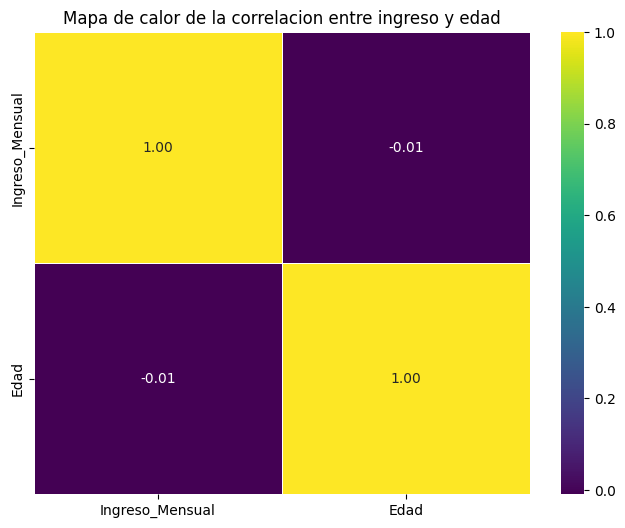

In [ ]:
var_num = df[['Ingreso_Mensual', 'Edad']]

matriz_correlacion = var_num.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(matriz_correlacion, annot = True, fmt = '.2f', cmap = 'viridis', linewidths = 0.5)
plt.title('Mapa de calor de la correlacion entre ingreso y edad')
plt.show()

### Grafico de bigotes

/tmp/ipython-input-54-496825628.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Preferencia_Productos', y = 'Ingreso_Mensual', palette = 'pastel')


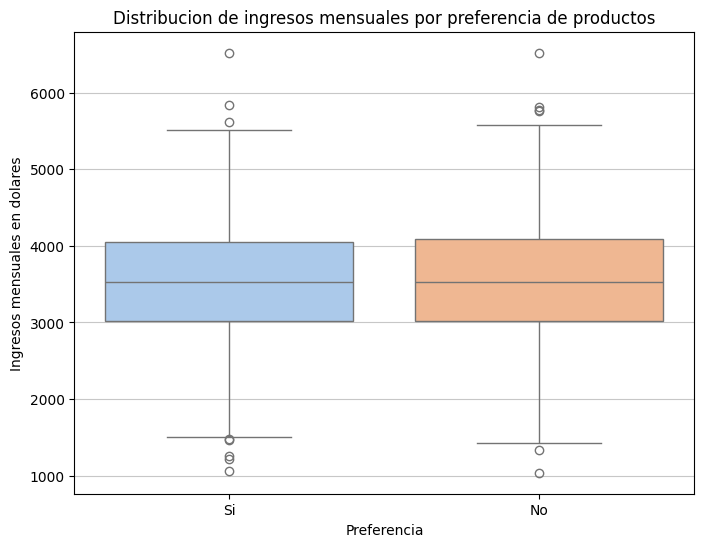

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df, x = 'Preferencia_Productos', y = 'Ingreso_Mensual', palette = 'pastel')
plt.title('Distribucion de ingresos mensuales por preferencia de productos')
plt.xlabel('Preferencia')
plt.ylabel('Ingresos mensuales en dolares')
plt.grid(axis = 'y', alpha = 0.7)
plt.show()

### Grilla de graficos (FacetGrid)

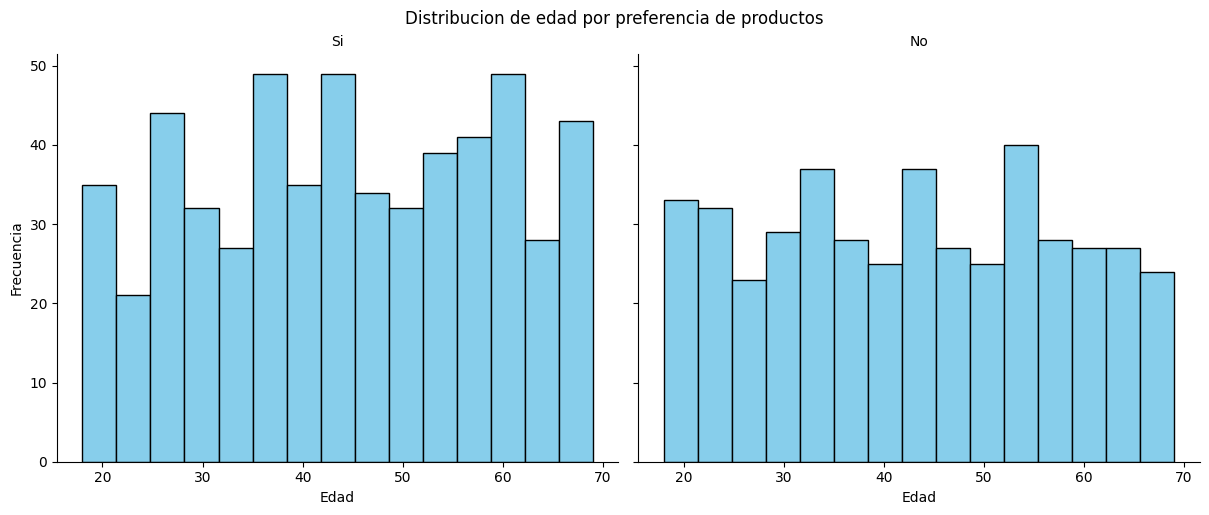

In [ ]:
g = sns.FacetGrid(data = df, col = 'Preferencia_Productos', height = 5, aspect = 1.2)
g.map(plt.hist, 'Edad', bins = 15, edgecolor = 'black', color = 'skyblue')
g.set_axis_labels('Edad', 'Frecuencia')
g.set_titles('{col_name}')
plt.suptitle('Distribucion de edad por preferencia de productos', y = 1.02)
plt.show()

## Test de significancia

In [2]:
import numpy as np
from scipy import stats

tiempo_recuperacion = np.array([3, 4, 5, 4, 3, 4, 5, 4, 3, 5])
tiempo_promedio_pob = 5

#H0 el tiempo de recuperacion promedio es de 5 dias

t_stat, p_value = stats.ttest_1samp(tiempo_recuperacion, tiempo_promedio_pob)
print(f'Prueba de hipotesis: {t_stat:.2f}')
print(f'Valor p: {p_value:.8f}')

if p_value < 0.05:
  print(f'Como el valor de p es menor a 0.05, rechazamos la hipotesis nula H0')
else:
  print(f'Como el valor de p es mayor a 0.05, aceptamos la hipotesis nula H0')

Prueba de hipotesis: -3.87
Valor p: 0.00377156
Como el valor de p es menor a 0.05, rechazamos la hipotesis nula H0


In [6]:
np.random.seed(100)
muestra = np.random.normal(loc = 108, scale = 10, size =30)

#H0 = el IQ promedio de un curso es 110
t_stat, p_value = stats.ttest_1samp(muestra, 110)
print(f'Prueba de hipotesis: {t_stat:.2f}')
print(f'P value: {p_value}')

if p_value < 0.05:
  print('Rechazamos la hipotesis nula.')
else:
  print('No rechazamos la hipotesis nula.')

Prueba de hipotesis: -0.23
P value: 0.8172668625709156
No rechazamos la hipotesis nula.


In [7]:
from statsmodels.stats.proportion import proportions_ztest

num_exitos = 50
tam_muestra = 200
valor_H0 = 0.3

#el valor de la proporcion bajo la hipotesis nula es del 30%, por lo tanto la hipotesis nula es que el 30% de los estudiantes practican un deporte

z_stat , p_value = proportions_ztest(num_exitos, tam_muestra, valor_H0)
print(f'Z estadistico: {z_stat}')
print(f'P value: {p_value}')

if p_value < 0.05:
  print('Rechazamos la hipotesis nula.')
else:
  print('No rechazamos la hipotesis nula.')

Z estadistico: -1.6329931618554518
P value: 0.10247043485974941
No rechazamos la hipotesis nula.


In [8]:
muestra = np.random.normal(495, 10, 25)

#Usar la prueba t dado que desconocemos la desv muestral
#H0: media de los paquetes es de 500 gr

t_stat, p_value = stats.ttest_1samp(muestra, 500)
print(f't estadistico: {t_stat}')
print(f'P value: {p_value}')

if p_value < 0.05:
  print('Rechazamos la hipotesis nula.')
else:
  print('No rechazamos la hipotesis nula.')

t estadistico: -4.731228838259111
P value: 8.224737645528863e-05
Rechazamos la hipotesis nula.


In [12]:
from statsmodels.stats.power import TTestIndPower

alfa = 0.05
power = 0.8
tam_efecto = 0.5 #tamaño de efecto que queremos para determinar el tamaño de la muestra de cada grupo

analisis = TTestIndPower()
sample_size = analisis.solve_power(tam_efecto, power = power, alpha = alfa)
print(f'Tamaño de la muestra necesaria: {sample_size:.2f}')

Tamaño de la muestra necesaria: 63.77


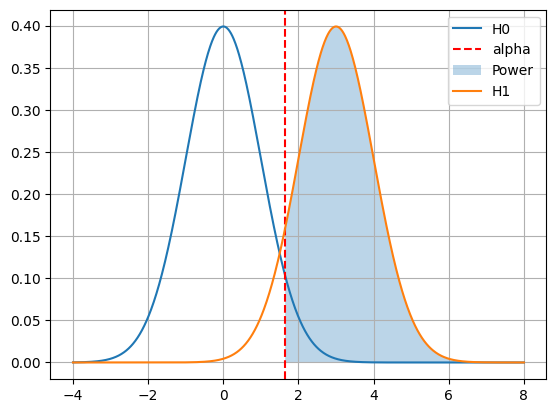

In [16]:
import matplotlib.pyplot as plt
from scipy.stats import norm

distribucion = np.linspace(-4, 8, 1000)
h0 = norm.pdf(distribucion, 0, 1)
h1 = norm.pdf(distribucion, 3, 1)

plt.plot(distribucion, h0, label = 'H0')
plt.axvline(norm.ppf(0.95), color = 'red', linestyle = '--', label = 'alpha')
plt.fill_between(distribucion[distribucion > norm.ppf(0.95)], h1[distribucion > norm.ppf(0.95)], alpha = 0.3, label = 'Power')
plt.plot(distribucion, h1, label = 'H1')
plt.grid(True)
plt.legend()
plt.show()

### Ejercicio

In [17]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/california-housing-prices


In [34]:
import os
import pandas as pd

os.listdir('/kaggle/input/california-housing-prices')
path = '/kaggle/input/california-housing-prices/housing.csv'
df = pd.read_csv(path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [23]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [26]:
media_pobla = df['median_house_value'].mean()
desv_pobla = df['median_house_value'].std()
print(f'Promedio de precios: {media_pobla:.2f}')
print(f'Desviacion estandar de precios: {desv_pobla:.2f}')

Promedio de precios: 206855.82
Desviacion estandar de precios: 115395.62


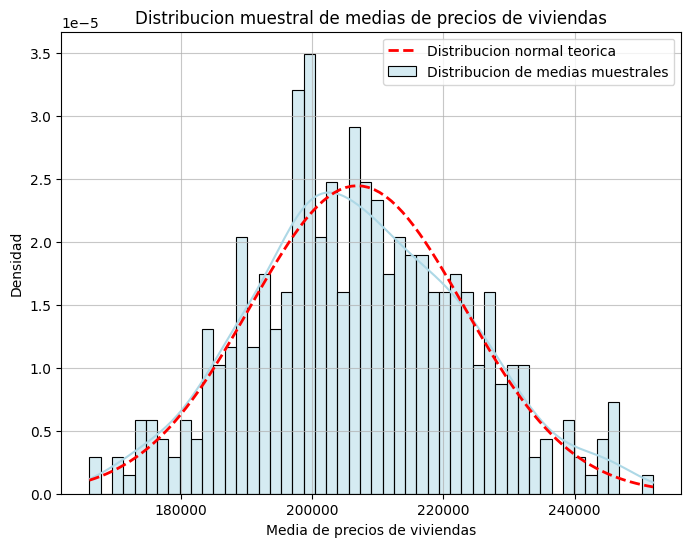

In [31]:
import seaborn as sns
from scipy.stats import norm, ttest_1samp, t

tam_muestra_tlc = 50
num_muestra_tlc = 400 #con 1000 se aleja mas de la distribucion normal
precio_pobla = df['median_house_value']

medias_muestrales = []
for _ in range (num_muestra_tlc):
  temp = np.random.choice(precio_pobla, size = tam_muestra_tlc, replace = True)
  medias_muestrales.append(np.mean(temp))

plt.figure(figsize = (8, 6))
sns.histplot(data = medias_muestrales, kde = True, bins = 50, edgecolor = 'black', color = 'lightblue', stat = 'density',
             label = 'Distribucion de medias muestrales')
temp = np.linspace(min(medias_muestrales), max(medias_muestrales), 100)
plt.plot(temp, norm.pdf(temp, loc = media_pobla, scale = desv_pobla / np.sqrt(tam_muestra_tlc)), color = 'red', linestyle = '--', linewidth = 2,
         label = 'Distribucion normal teorica')
plt.title('Distribucion muestral de medias de precios de viviendas')
plt.xlabel('Media de precios de viviendas')
plt.ylabel('Densidad')
plt.grid(True, alpha = 0.7)
plt.legend()
plt.show()

In [35]:
df_clean = df.dropna(subset = ['median_house_value'])
muestra_precios = df_clean['median_house_value']

media_muestral = muestra_precios.mean()
desv_muestral = muestra_precios.std()
tam_muestral = len(muestra_precios)

lvl_confianza =0.95

grados_libertad = tam_muestra - 1
t_crit = t.ppf(1 - (1 - lvl_confianza) / 2, df = grados_libertad)

error_std = desv_muestral / np.sqrt(tam_muestra)

marg_error = error_std * t_crit

lim_inf = media_muestral - marg_error
lim_sup = media_muestral + marg_error